In [1]:
import matplotlib.pyplot as plot
import numpy as np
import odespy

%matplotlib inline

In [2]:
from pyclouds import cloud_microphysics, parameterisations
from pyclouds.common import Var
from pyclouds.plotting import plot_hydrometeor_evolution

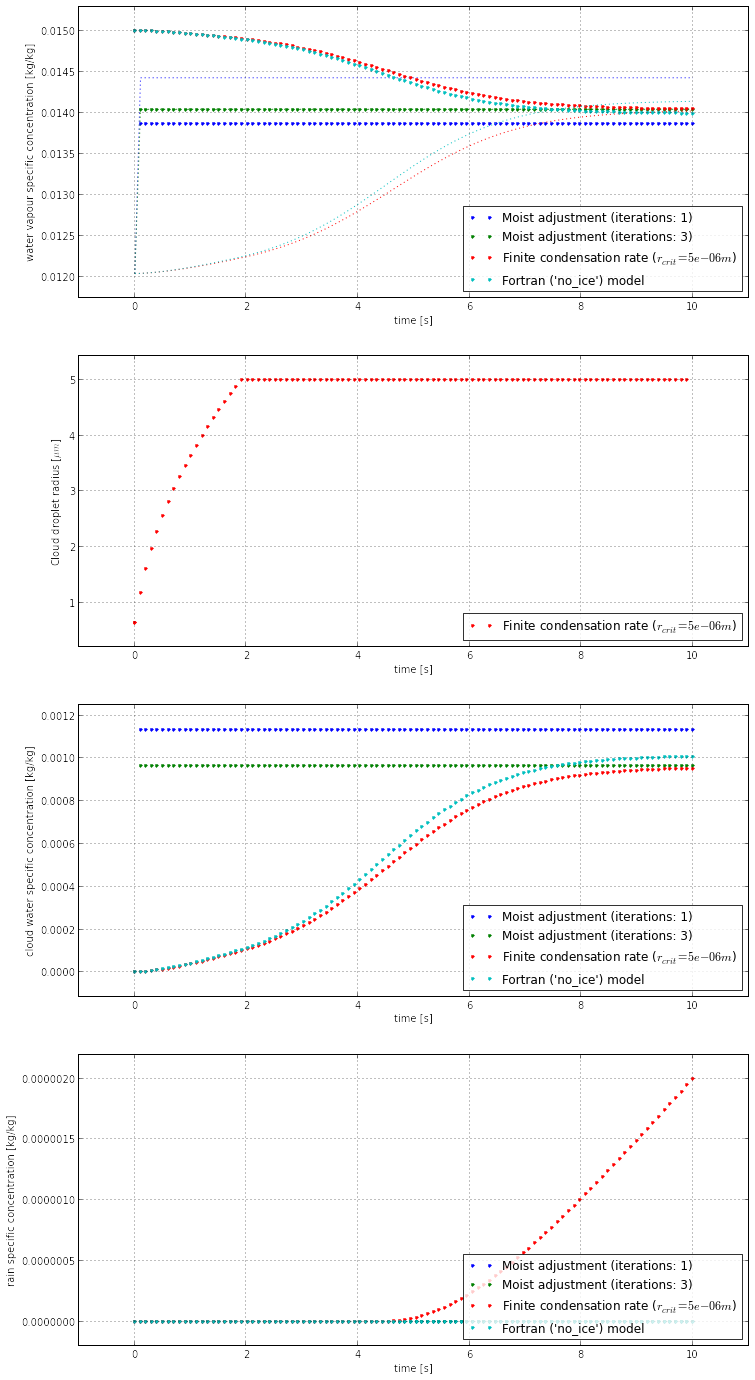

In [5]:
initial_condition = np.zeros((Var.NUM))
initial_condition[Var.q_v] = 1.5e-2
initial_condition[Var.q_l] = 2.0e-7

initial_condition[Var.T] = 288.
p0 = 88676.  # [Pa]

t_ = np.linspace(0., 10., 100)

SolverClass = odespy.Euler

microphysics_model = cloud_microphysics.MoistAdjustmentMicrophysics()
solutions = []
solutions.append(microphysics_model.integrate(initial_condition=initial_condition, t=t_, p0=p0))
solutions.append(microphysics_model.integrate(initial_condition=initial_condition, t=t_, p0=p0, iterations=3))
#solutions.append(cloud_microphysics.FiniteCondensationTimeMicrophysics().integrate(initial_condition=initial_condition, t=t_, p0=p0, SolverClass=SolverClass))
solutions.append(cloud_microphysics.FiniteCondensationTimeMicrophysics().integrate(initial_condition=initial_condition, t=t_, p0=p0, SolverClass=SolverClass))
#solutions.append(cloud_microphysics.FiniteCondensationTimeMicrophysics(r_crit=np.inf).integrate(initial_condition=initial_condition, t=t_, p0=p0, SolverClass=SolverClass))
solutions.append(cloud_microphysics.FortranNoIceMicrophysics().integrate(initial_condition=initial_condition, t=t_, p0=p0, SolverClass=SolverClass))


#sol2.plot()
plot = plot_hydrometeor_evolution(solutions, variables=['q_v', 'r_c', 'q_l', 'q_r'])